In [34]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
from matplotlib import pyplot as plt

In [35]:
df = pd.read_csv("data_processed_Melbourne-Processed.csv", parse_dates=['date'], index_col=['date'])
df


,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,wind_direction,average_wind_speed,wind_gust,pressure,rainfall
date,,,,,,,,,
2011-01-01 00:00:00,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2011-01-01 00:30:00,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
2011-01-01 01:00:00,24.1,0.0,13.3,51.0,NNE,7.0,7.0,1007.3,0.0
2011-01-01 01:30:00,23.6,0.0,13.5,53.0,ENE,6.0,7.0,1007.3,0.0
2011-01-01 02:00:00,23.7,0.0,13.8,53.0,CALM,0.0,0.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-16 16:00:00,19.9,17.9,12.7,63.0,S,20.0,30.0,1024.1,0.0
2021-03-16 16:30:00,19.9,18.0,13.1,65.0,S,20.0,28.0,1023.7,0.0
2021-03-16 17:00:00,20.5,19.1,13.5,64.0,S,19.0,28.0,1023.5,0.0


In [36]:
df_stats = df.describe()
df_stats.iloc[1:8]

,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,average_wind_speed,wind_gust,pressure,rainfall
mean,15.93726,11.861452,9.005224,66.327874,19.409849,22.535363,1017.038051,0.769790
std,5.61278,7.221979,4.071999,17.703771,10.671035,12.704181,7.583467,2.895102
min,1.10000,-3.400000,-8.700000,0.000000,0.000000,0.000000,988.100000,0.000000
25%,11.90000,7.300000,6.100000,55.000000,11.000000,13.000000,1012.000000,0.000000
50%,15.20000,11.600000,8.600000,67.000000,17.000000,20.000000,1017.200000,0.000000
75%,19.10000,16.400000,11.618750,79.000000,26.000000,30.000000,1022.300000,0.200000
max,43.20000,43.300000,36.900000,100.000000,85.000000,104.000000,1039.000000,54.600000


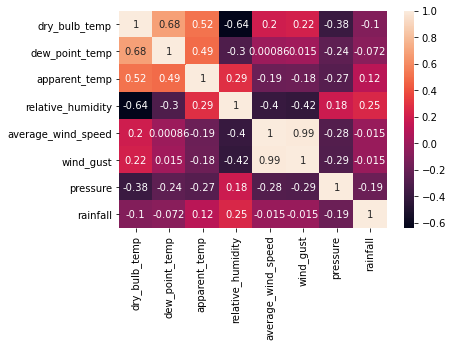

In [37]:
dataplot = sb.heatmap(df.corr(), annot=True)
plt.show()

In [38]:
Daily_mean=df.resample('24H').mean()
Monthly_mean=df.resample('1M').mean()
Daily_max=df.resample('24H').max()
Monthly_max=df.resample('1M').max()
Daily_min=df.resample('24H').min()
Monthly_min=df.resample('1M').min()
Average_Max_Data=Daily_max.resample('1M').mean()
Average_Min_Data=Daily_min.resample('1M').mean()
Daily_max

,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,wind_direction,average_wind_speed,wind_gust,pressure,rainfall
date,,,,,,,,,
2011-01-01,24.8,0.0,14.9,79.0,WSW,37.0,43.0,1015.1,0.0
2011-01-02,21.4,0.0,11.4,71.0,SSW,33.0,39.0,1017.6,0.0
2011-01-03,19.8,0.0,6.9,57.0,SSE,35.0,41.0,1018.4,0.0
2011-01-04,20.8,0.0,12.4,74.0,WSW,28.0,30.0,1016.3,0.0
2011-01-05,21.2,0.0,13.1,78.0,WSW,32.0,37.0,1012.4,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-12,29.8,29.2,17.1,100.0,WNW,24.0,33.0,1018.0,0.0
2021-03-13,27.1,27.6,17.3,96.0,WSW,46.0,59.0,1017.6,15.8
2021-03-14,17.4,14.1,9.3,81.0,WSW,30.0,41.0,1023.9,17.2


In [39]:
rainfall_at_0830 = df.at_time("8:30")["rainfall"]
Daily_max["rainfall"] = list(rainfall_at_0830)
Daily_max

,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,wind_direction,average_wind_speed,wind_gust,pressure,rainfall
date,,,,,,,,,
2011-01-01,24.8,0.0,14.9,79.0,WSW,37.0,43.0,1015.1,0.0
2011-01-02,21.4,0.0,11.4,71.0,SSW,33.0,39.0,1017.6,0.0
2011-01-03,19.8,0.0,6.9,57.0,SSE,35.0,41.0,1018.4,0.0
2011-01-04,20.8,0.0,12.4,74.0,WSW,28.0,30.0,1016.3,0.0
2011-01-05,21.2,0.0,13.1,78.0,WSW,32.0,37.0,1012.4,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-12,29.8,29.2,17.1,100.0,WNW,24.0,33.0,1018.0,0.0
2021-03-13,27.1,27.6,17.3,96.0,WSW,46.0,59.0,1017.6,0.0
2021-03-14,17.4,14.1,9.3,81.0,WSW,30.0,41.0,1023.9,17.2


<AxesSubplot:title={'center':'January Mean Maximum Temperature'}, xlabel='Year', ylabel='Temperature'>

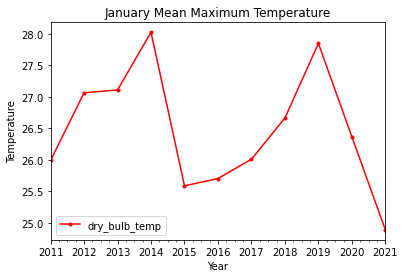

In [40]:
Average_Max_Data_Jan = Average_Max_Data[ Average_Max_Data.index.month == 1]
Average_Max_Data_Jan.plot(y='dry_bulb_temp', kind = 'line', style= '.-', xlabel= 'Year', ylabel= 'Temperature', title = 'January Mean Maximum Temperature', color = 'red')

<AxesSubplot:title={'center':'Annual Mean Maximum Temperature'}, xlabel='Year', ylabel='Temperature'>

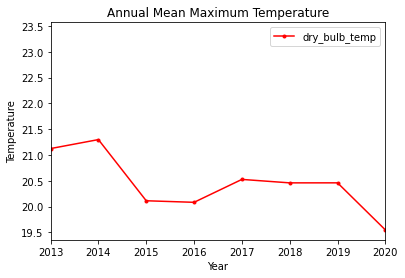

In [41]:
Average_Monthly_Max_Year = Average_Max_Data.resample('1Y').mean()
Average_Monthly_Max_Year.plot(y='dry_bulb_temp', kind = 'line', style= '.-', xlabel= 'Year', ylabel= 'Temperature', title = 'Annual Mean Maximum Temperature', color = 'red', xlim = (43, 50))

<AxesSubplot:title={'center':'August Mean Minimum Temperature'}, xlabel='Year', ylabel='Temperature'>

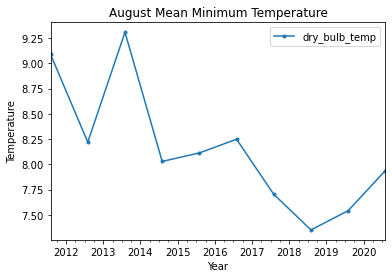

In [42]:
Average_Min_Data_Aug = Average_Min_Data[ Average_Min_Data.index.month == 8]
Average_Min_Data_Aug.plot(y='dry_bulb_temp', kind = 'line', style= '.-', xlabel= 'Year', ylabel= 'Temperature', title = 'August Mean Minimum Temperature')

<ipython-input-43-6ce26b6b1883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Average_Min_Data_Aug['date']=Average_Min_Data_Aug.index
<ipython-input-43-6ce26b6b1883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Average_Min_Data_Aug['Year']=Average_Min_Data_Aug['date'].dt.year


<AxesSubplot:title={'center':'August Mean Minimum Temperature'}, xlabel='Year', ylabel='Temperature'>

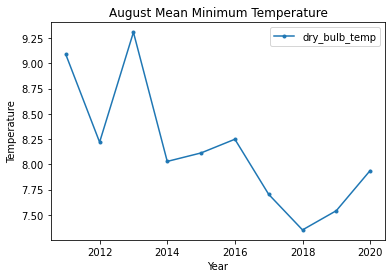

In [43]:
Average_Min_Data_Aug['date']=Average_Min_Data_Aug.index
Average_Min_Data_Aug['Year']=Average_Min_Data_Aug['date'].dt.year
Average_Min_Data_Aug.plot(y='dry_bulb_temp', x='Year', kind = 'line', style= '.-', xlabel= 'Year', ylabel= 'Temperature', title = 'August Mean Minimum Temperature')


<AxesSubplot:title={'center':'Annual Mean Minimum Temperature'}, xlabel='Year', ylabel='Temperature'>

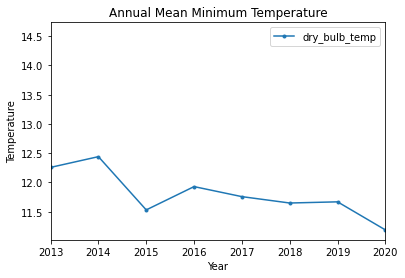

In [44]:
Average_Monthly_Min_Year = Average_Min_Data.resample('1Y').mean()
Average_Monthly_Min_Year.plot(y='dry_bulb_temp', kind = 'line', style= '.-', xlabel= 'Year', ylabel= 'Temperature', title = 'Annual Mean Minimum Temperature', xlim = (43, 50))

In [45]:
Daily_max_total = Daily_max.resample('1M').sum()
Daily_max_total

,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,average_wind_speed,wind_gust,pressure,rainfall
date,,,,,,,,
2011-01-31,805.700000,0.0,518.090909,2557.000000,988.181818,1154.909091,31433.638182,83.626667
2011-02-28,687.998217,0.0,463.236364,2328.421053,816.137255,957.764706,28521.933333,44.784599
2011-03-31,710.600000,0.0,429.000000,2497.000000,986.000000,1139.000000,31590.970000,30.236364
2011-04-30,615.700000,0.0,363.740000,2641.300000,904.000000,1031.000000,30720.454545,80.478462
2011-05-31,492.700000,0.0,293.000000,2656.000000,902.000000,1054.000000,31705.900000,67.200000
...,...,...,...,...,...,...,...,...
2020-11-30,738.100000,692.7,423.000000,2663.000000,1043.000000,1229.000000,30561.300000,33.600000
2020-12-31,694.000000,634.3,409.100000,2681.000000,1155.000000,1338.000000,31574.400000,42.000000
2021-01-31,771.500000,744.6,493.800000,2761.000000,1027.000000,1196.000000,31515.300000,86.000000


In [46]:
Daily_max_total_Nov = Daily_max_total[Daily_max_total.index.month == 11]

<ipython-input-47-a8acfbf9f49b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_max_total_Nov['date']=Daily_max_total_Nov.index
<ipython-input-47-a8acfbf9f49b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_max_total_Nov['Year']=Daily_max_total_Nov['date'].dt.year


<AxesSubplot:title={'center':'November Rainfall'}, xlabel='Year', ylabel='Rainfall (mm)'>

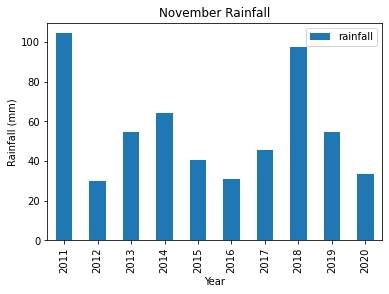

In [47]:
Daily_max_total_Nov['date']=Daily_max_total_Nov.index
Daily_max_total_Nov['Year']=Daily_max_total_Nov['date'].dt.year
Daily_max_total_Nov.plot(y='rainfall', x='Year', kind = 'bar', xlabel= 'Year', ylabel= 'Rainfall (mm)', title = 'November Rainfall')


<AxesSubplot:title={'center':'Annual Rainfall'}, xlabel='Year', ylabel='Rainfall (mm)'>

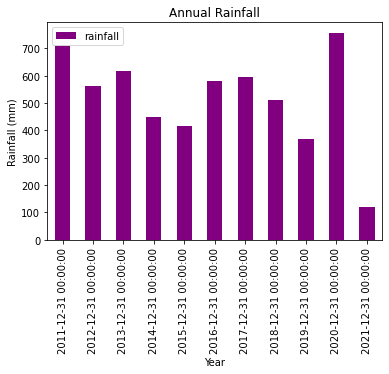

In [48]:
Daily_max_total_Year = Daily_max_total.resample('1Y').sum()
Daily_max_total_Year.plot(y='rainfall', kind = 'bar', xlabel= 'Year', ylabel= 'Rainfall (mm)', title = 'Annual Rainfall', color = 'purple', xlim = (43, 50))

In [49]:
Jan_Max_Daily_Data = Daily_max[Daily_max.index.month == 1]
Feb_Max_Daily_Data = Daily_max[Daily_max.index.month == 2]
Mar_Max_Daily_Data = Daily_max[Daily_max.index.month == 3]
Apr_Max_Daily_Data = Daily_max[Daily_max.index.month == 4]
May_Max_Daily_Data = Daily_max[Daily_max.index.month == 5]
Jun_Max_Daily_Data = Daily_max[Daily_max.index.month == 6]
Jul_Max_Daily_Data = Daily_max[Daily_max.index.month == 7]
Aug_Max_Daily_Data = Daily_max[Daily_max.index.month == 8]
Sep_Max_Daily_Data = Daily_max[Daily_max.index.month == 9]
Oct_Max_Daily_Data = Daily_max[Daily_max.index.month == 10]
Nov_Max_Daily_Data = Daily_max[Daily_max.index.month == 11]
Dec_Max_Daily_Data = Daily_max[Daily_max.index.month == 12]

In [50]:
print(Jan_Max_Daily_Data['dry_bulb_temp'].mean())
print(Feb_Max_Daily_Data['dry_bulb_temp'].mean())
print(Mar_Max_Daily_Data['dry_bulb_temp'].mean())
print(Apr_Max_Daily_Data['dry_bulb_temp'].mean())
print(May_Max_Daily_Data['dry_bulb_temp'].mean())
print(Jun_Max_Daily_Data['dry_bulb_temp'].mean())
print(Jul_Max_Daily_Data['dry_bulb_temp'].mean())
print(Aug_Max_Daily_Data['dry_bulb_temp'].mean())
print(Sep_Max_Daily_Data['dry_bulb_temp'].mean())
print(Oct_Max_Daily_Data['dry_bulb_temp'].mean())
print(Nov_Max_Daily_Data['dry_bulb_temp'].mean())
print(Dec_Max_Daily_Data['dry_bulb_temp'].mean())

26.477712609970677
25.85883671211836
24.174082189112855
20.789333333333325
17.223870967741927
14.641333333333328
14.283225806451608
15.064193548387099
17.854666666666663
20.727741935483873
22.904875
24.722903225806448


In [51]:
data = {'Month':['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       'Max_Temperature':[26.477712609970677, 25.85883671211836, 24.174082189112855, 20.789333333333325, 17.223870967741927, 14.641333333333328, 14.283225806451608, 15.064193548387099, 17.854666666666663, 20.727741935483873, 22.904875, 24.722903225806448],
       'BOM_Max': [26.6, 25.9, 24.1, 20.2, 16.3, 13.8, 13.2, 14.4, 16.9, 19.5, 22.0, 24.6]}

<AxesSubplot:title={'center':'Mean Maximum Temperature for each month 2011-2021 vs BOM'}, xlabel='Months', ylabel='Temperature'>

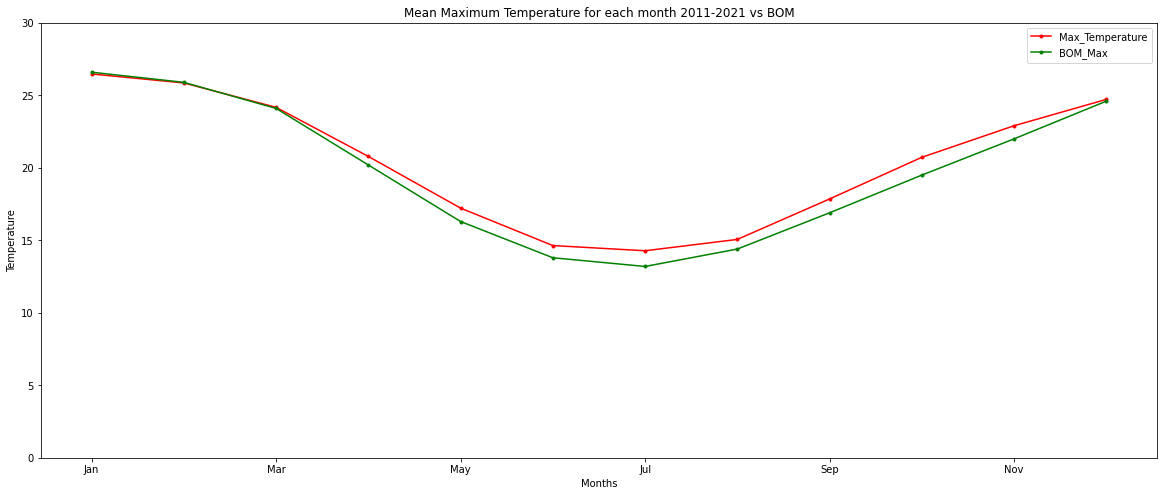

In [52]:
df1 = pd.DataFrame(data)
fig, ax = plt.subplots()
df1.plot(y='Max_Temperature', x='Month', kind = 'line', style= '.-', ax = ax, color = 'red', xlabel= 'Months', ylabel= 'Temperature', title = 'Mean Maximum Temperature for each month 2011-2021 vs BOM', ylim = [0,30], figsize=(20,8))
df1.plot(y='BOM_Max', x='Month', kind = 'line', style= '.-', ax = ax, color = 'green', xlabel= 'Months', ylabel= 'Temperature', title = 'Mean Maximum Temperature for each month 2011-2021 vs BOM', ylim = [0,30], figsize=(20,8))

In [53]:
Jan_Min_Daily_Data = Daily_min[Daily_min.index.month == 1]
Feb_Min_Daily_Data = Daily_min[Daily_min.index.month == 2]
Mar_Min_Daily_Data = Daily_min[Daily_min.index.month == 3]
Apr_Min_Daily_Data = Daily_min[Daily_min.index.month == 4]
May_Min_Daily_Data = Daily_min[Daily_min.index.month == 5]
Jun_Min_Daily_Data = Daily_min[Daily_min.index.month == 6]
Jul_Min_Daily_Data = Daily_min[Daily_min.index.month == 7]
Aug_Min_Daily_Data = Daily_min[Daily_min.index.month == 8]
Sep_Min_Daily_Data = Daily_min[Daily_min.index.month == 9]
Oct_Min_Daily_Data = Daily_min[Daily_min.index.month == 10]
Nov_Min_Daily_Data = Daily_min[Daily_min.index.month == 11]
Dec_Min_Daily_Data = Daily_min[Daily_min.index.month == 12]
print(Jan_Min_Daily_Data['dry_bulb_temp'].mean())
print(Feb_Min_Daily_Data['dry_bulb_temp'].mean())
print(Mar_Min_Daily_Data['dry_bulb_temp'].mean())
print(Apr_Min_Daily_Data['dry_bulb_temp'].mean())
print(May_Min_Daily_Data['dry_bulb_temp'].mean())
print(Jun_Min_Daily_Data['dry_bulb_temp'].mean())
print(Jul_Min_Daily_Data['dry_bulb_temp'].mean())
print(Aug_Min_Daily_Data['dry_bulb_temp'].mean())
print(Sep_Min_Daily_Data['dry_bulb_temp'].mean())
print(Oct_Min_Daily_Data['dry_bulb_temp'].mean())
print(Nov_Min_Daily_Data['dry_bulb_temp'].mean())
print(Dec_Min_Daily_Data['dry_bulb_temp'].mean())

16.49310850439884
16.22687419761375
15.060991820040906
12.136015151515153
10.163440860215054
7.972933333333323
7.982580645161283
8.153870967741936
9.400843333333325
10.959873271889396
12.952518518518513
14.620477419354842


In [54]:
data2 = {'Month':['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       'Mini_Temperature':[16.49310850439884, 16.22687419761375, 15.060991820040906, 12.136015151515153, 10.163440860215054, 7.972933333333323, 7.982580645161283, 8.153870967741936, 9.400843333333325, 10.959873271889396, 12.952518518518513, 14.620477419354842]}

<AxesSubplot:title={'center':'Mean Minimum Temperature for each month 2011-2021'}, xlabel='Months', ylabel='Temperature'>

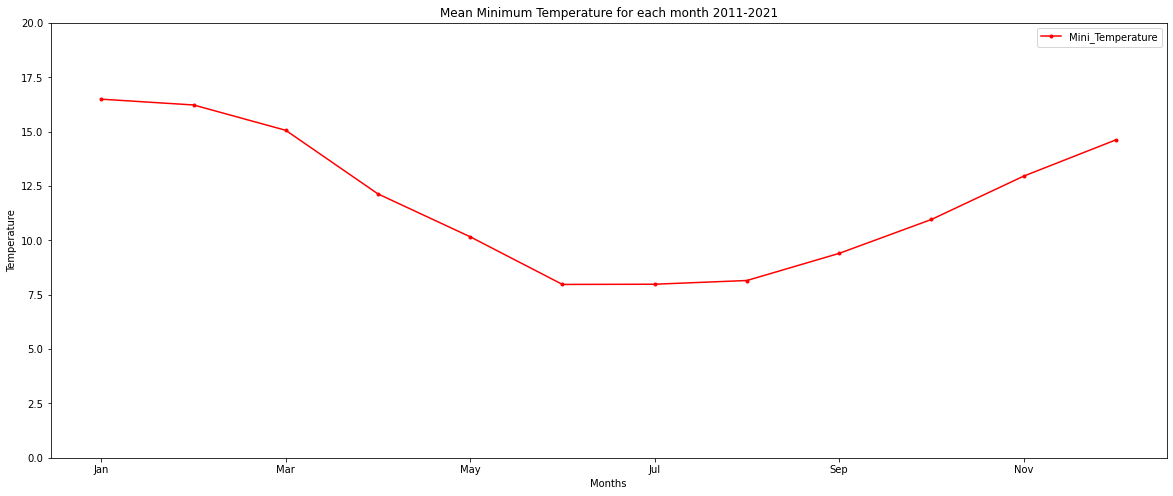

In [55]:
df2 = pd.DataFrame(data2)
df2.plot(y='Mini_Temperature', x='Month', kind = 'line', style= '.-', color = 'red', xlabel= 'Months', ylabel= 'Temperature', title = 'Mean Minimum Temperature for each month 2011-2021', ylim = [0,20], figsize=(20,8))

In [56]:
print(Jan_Max_Daily_Data['rainfall'].sum()/11)
print(Feb_Max_Daily_Data['rainfall'].sum()/11)
print(Mar_Max_Daily_Data['rainfall'].sum()/11)
print(Apr_Max_Daily_Data['rainfall'].sum()/10)
print(May_Max_Daily_Data['rainfall'].sum()/10)
print(Jun_Max_Daily_Data['rainfall'].sum()/10)
print(Jul_Max_Daily_Data['rainfall'].sum()/10)
print(Aug_Max_Daily_Data['rainfall'].sum()/10)
print(Sep_Max_Daily_Data['rainfall'].sum()/10)
print(Oct_Max_Daily_Data['rainfall'].sum()/10)
print(Nov_Max_Daily_Data['rainfall'].sum()/10)
print(Dec_Max_Daily_Data['rainfall'].sum()/10)

48.59722943722944
33.30769081186193
33.35890342822161
57.907846153846165
51.68363636363637
45.564800000000005
41.18
46.92
46.924
41.3072514619883
55.519999999999996
55.16524444444444


In [57]:
data3 = {'Month':['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       'Mean_monthly_rainfall':[48.59722943722944, 33.30769081186193, 33.35890342822161, 57.907846153846165, 51.68363636363637, 45.5648, 41.18, 46.92, 46.924, 41.3072514619883, 55.519999999999996, 55.16524444444444],
        'BOM_rainfall': [43.7, 44.5, 39.4, 54.3, 48.8, 40.1, 42.9, 48.2, 50.5, 58.7, 58.3, 51.6]}

<AxesSubplot:title={'center':'Mean Rainfall for each month 2011-2021 vs BOM'}, xlabel='Month', ylabel='Mean Rainfall(mm)'>

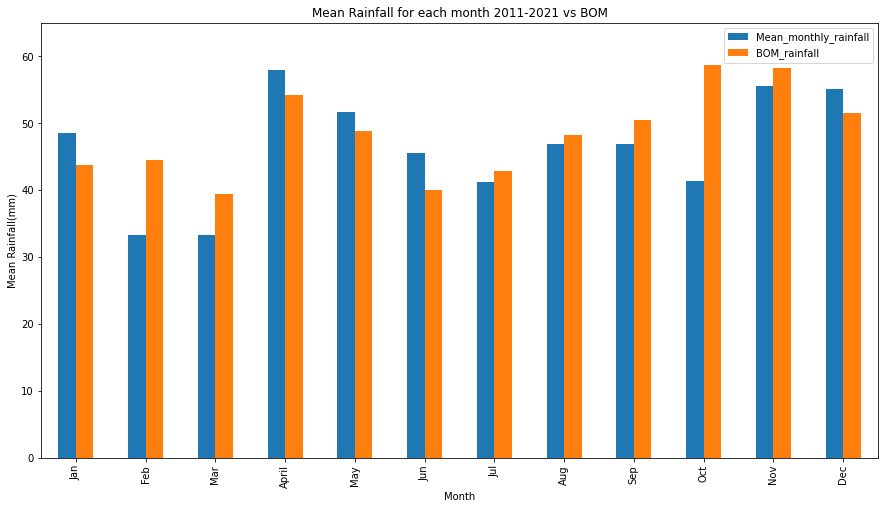

In [58]:
df3 = pd.DataFrame(data3)
fig, ax = plt.subplots()
df3.plot(x='Month', kind = 'bar', ax = ax, xlabel= 'Month', ylabel= 'Mean Rainfall(mm)', title = 'Mean Rainfall for each month 2011-2021 vs BOM', ylim = [0,65], figsize=(15,8))


In [59]:
Iod_df = pd.read_csv("IOD_Data.txt", header = None, delim_whitespace=True,)
Iod_df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [60]:
Iod_df

,Year,Jan,Feb,Mar,April,May,June,Jul,Aug,Sep,Oct,Nov,Dec
0,1870,-0.373,-0.256,0.277,0.027,-0.400,-0.434,-0.554,-0.409,-0.622,-0.476,-0.278,-0.306
1,1871,-0.208,-0.090,-0.112,-0.073,-0.035,-0.049,-0.347,-0.263,-0.230,-0.368,-0.094,-0.159
2,1872,0.028,0.121,0.024,-0.009,-0.069,0.030,-0.189,-0.213,-0.227,-0.111,0.017,-0.041
3,1873,0.127,-0.239,-0.304,-0.196,-0.331,-0.473,-0.593,-0.688,-0.588,-0.319,-0.229,-0.233
4,1874,-0.316,-0.308,-0.486,-0.678,-0.361,-0.351,-0.242,-0.232,-0.708,-0.999,-0.480,-0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2016,0.331,-0.030,0.091,0.222,-0.034,-0.329,-0.661,-0.332,-0.331,-0.212,-0.259,-0.241
147,2017,-0.020,0.181,0.457,0.574,0.616,0.537,0.617,0.461,0.140,0.175,0.412,0.179
148,2018,-0.135,0.295,-0.020,-0.008,0.202,0.269,0.150,0.234,0.710,0.844,0.623,0.379
149,2019,0.452,0.496,0.325,0.333,0.619,0.719,0.693,0.548,0.999,1.123,0.958,0.312


In [61]:
Iod_df_rel = Iod_df.iloc[141:151]

In [62]:
Iod_df_rel

,Year,Jan,Feb,Mar,April,May,June,Jul,Aug,Sep,Oct,Nov,Dec
141,2011,0.257,0.322,0.467,0.229,-0.010,0.169,0.319,0.457,0.308,0.516,0.459,-0.059
142,2012,0.111,0.002,0.126,-0.196,-0.290,0.115,0.643,0.764,0.559,0.270,0.024,0.337
143,2013,0.001,0.269,0.183,-0.222,-0.426,-0.383,-0.083,-0.082,-0.204,-0.009,0.323,0.210
144,2014,-0.036,-0.009,-0.051,0.017,-0.012,0.086,-0.266,-0.260,-0.039,0.300,0.133,0.116
145,2015,-0.034,-0.265,-0.141,0.067,0.320,0.410,0.322,0.680,0.400,0.642,0.470,0.341
146,2016,0.331,-0.030,0.091,0.222,-0.034,-0.329,-0.661,-0.332,-0.331,-0.212,-0.259,-0.241
147,2017,-0.020,0.181,0.457,0.574,0.616,0.537,0.617,0.461,0.140,0.175,0.412,0.179
148,2018,-0.135,0.295,-0.020,-0.008,0.202,0.269,0.150,0.234,0.710,0.844,0.623,0.379
149,2019,0.452,0.496,0.325,0.333,0.619,0.719,0.693,0.548,0.999,1.123,0.958,0.312
150,2020,0.238,0.134,0.119,0.064,0.378,0.568,0.417,-0.070,-0.084,0.233,0.143,0.100


In [63]:
Iod_df_rel_melted=Iod_df_rel.melt(id_vars = ['Year'])
Iod_df_rel_melted=Iod_df_rel_melted.rename(columns= {'variable' : 'Month'})
Iod_df_rel_melted=Iod_df_rel_melted.set_index(['Year', 'Month'])
Iod_df_rel_melted

,,value
Year,Month,
2011,Jan,0.257
2012,Jan,0.111
2013,Jan,0.001
2014,Jan,-0.036
2015,Jan,-0.034
...,...,...
2016,Dec,-0.241
2017,Dec,0.179
2018,Dec,0.379


In [64]:
data_IOD = {'Date':['Jan-2011', 'Feb-2011', 'Mar-2011', 'April-2011', 'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011', 'Jan-2012', 'Feb-2012', 'Mar-2012', 'April-2012', 'May-2012', 'Jun-2012', 'Jul-2012', 'Aug-2012', 'Sep-2012', 'Oct-2012', 'Nov-2012', 'Dec-2012', 'Jan-2013', 'Feb-2013', 'Mar-2013', 'April-2013', 'May-2013', 'Jun-2013', 'Jul-2013', 'Aug-2013', 'Sep-2013', 'Oct-2013', 'Nov-2013', 'Dec-2013', 'Jan-2014', 'Feb-2014', 'Mar-2014', 'April-2014', 'May-2014', 'Jun-2014', 'Jul-2014', 'Aug-2014', 'Sep-2014', 'Oct-2014', 'Nov-2014', 'Dec-2014', 'Jan-2015', 'Feb-2015', 'Mar-2015', 'April-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'April-2016', 'May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016', 'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017', 'Mar-2017', 'April-2017', 'May-2017', 'Jun-2017', 'Jul-2017', 'Aug-2017', 'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dec-2017', 'Jan-2018', 'Feb-2018', 'Mar-2018', 'April-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018', 'Jan-2019', 'Feb-2019', 'Mar-2019', 'April-2019', 'May-2019', 'Jun-2019', 'Jul-2019', 'Aug-2019', 'Sep-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020', 'Feb-2020', 'Mar-2020', 'April-2020', 'May-2020', 'Jun-2020', 'Jul-2020', 'Aug-2020', 'Sep-2020', 'Oct-2020', 'Nov-2020', 'Dec-2020'],
       'IOD':[0.257, 0.322, 0.467, 0.229, -0.010, 0.169, 0.319, 0.457, 0.308, 0.516, 0.459, -0.059, 0.111, 0.002, 0.126, -0.196, -0.290, 0.115, 0.643, 0.764, 0.559, 0.270, 0.024, 0.337, 0.001, 0.269, 0.183, -0.222, -0.426, -0.383, -0.083, -0.082, -0.204, -0.009, 0.323, 0.210, -0.036, -0.009, -0.051, 0.017, -0.012, 0.086, -0.266, -0.260, 0.039, 0.300, 0.133, 0.116, -0.034, -0.265, -0.141, 0.067, 0.320, 0.410, 0.322, 0.680, 0.400, 0.642, 0.470, 0.341, 0.331, -0.03, 0.091, 0.222, -0.034, -0.329, -0.661, -0.332, -0.331, -0.212, -0.259, -0.241, -0.020, 0.181, 0.457, 0.574, 0.616, 0.537, 0.617, 0.461, 0.140, 0.175, 0.412, 0.179, -0.135, 0.295, -0.020, -0.008, 0.202, 0.269, 0.150, 0.234, 0.710, 0.844, 0.623, 0.379, 0.452, 0.496, 0.325, 0.333, 0.619, 0.719, 0.693, 0.548, 0.999, 1.123, 0.958, 0.312, 0.238, 0.134, 0.119, 0.064, 0.378, 0.568, 0.417, -0.070, -0.084, 0.233, 0.143, 0.100]}

In [65]:
df4 = pd.DataFrame(data_IOD)
df4

,Date,IOD
0,Jan-2011,0.257
1,Feb-2011,0.322
2,Mar-2011,0.467
3,April-2011,0.229
4,May-2011,-0.010
...,...,...
115,Aug-2020,-0.070
116,Sep-2020,-0.084
117,Oct-2020,0.233
118,Nov-2020,0.143


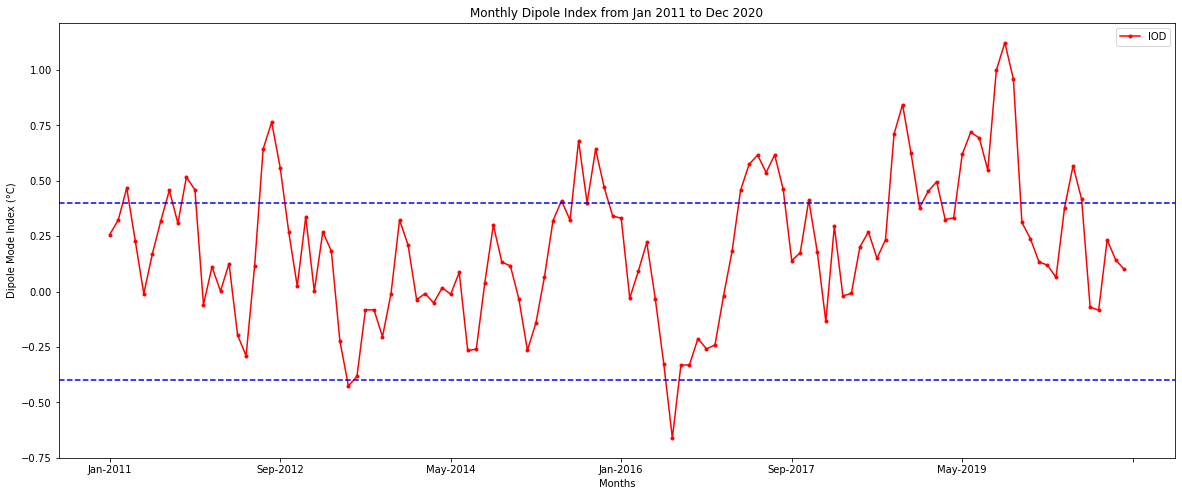

In [66]:
df4.plot(y='IOD', x='Date', kind = 'line', style= '.-', color = 'red', xlabel= 'Months', ylabel= 'Dipole Mode Index (°C)', title = 'Monthly Dipole Index from Jan 2011 to Dec 2020', figsize=(20,8))
plt.axhline(y = 0.4, color = 'b', linestyle = '--')
plt.axhline(y = -0.4, color = 'b', linestyle = '--')
plt.show()


In [67]:
df_bom = pd.read_csv("BOM_Data.csv")
LongTermAveMaxTemp = df_bom.loc[0, 'January':'December']
LongTermAveMaxTemp = list(LongTermAveMaxTemp)
y = np.array(Daily_max.resample('M').agg('mean')['dry_bulb_temp'])
x = np.array(LongTermAveMaxTemp*(123//12) + LongTermAveMaxTemp[:3]).astype(float)
df6 = pd.DataFrame(([y[i]-x[i] for i in range(123)]), columns=["Temperature Differences"])

In [68]:
y = np.array(Daily_max.resample('M').agg('mean')['dry_bulb_temp'])
x = np.array(LongTermAveMaxTemp*(123//12) + LongTermAveMaxTemp[:3]).astype(float)


In [69]:
df6 = pd.DataFrame(([y[i]-x[i] for i in range(123)]), columns=["Temperature Differences"])
df6


,Temperature Differences
0,-0.609677
1,-1.328635
2,-1.177419
3,0.323333
4,-0.406452
...,...
118,2.603333
119,-2.212903
120,-1.712903
121,-1.771429


In [72]:
LongTermAveRainfall = df_bom.loc[23, 'January':'December']
LongTermAveRainfall = list(LongTermAveRainfall)
y1 = np.array(Daily_max_total['rainfall'])
x1 = np.array(LongTermAveRainfall*(123//12) + LongTermAveRainfall[:3]).astype(float)
df7 = pd.DataFrame(([y1[i]-x1[i] for i in range(123)]), columns=["Rainfall Differences"])

In [73]:
y1 = np.array(Daily_max_total['rainfall'])
x1 = np.array(LongTermAveRainfall*(123//12) + LongTermAveRainfall[:3]).astype(float)

<AxesSubplot:>

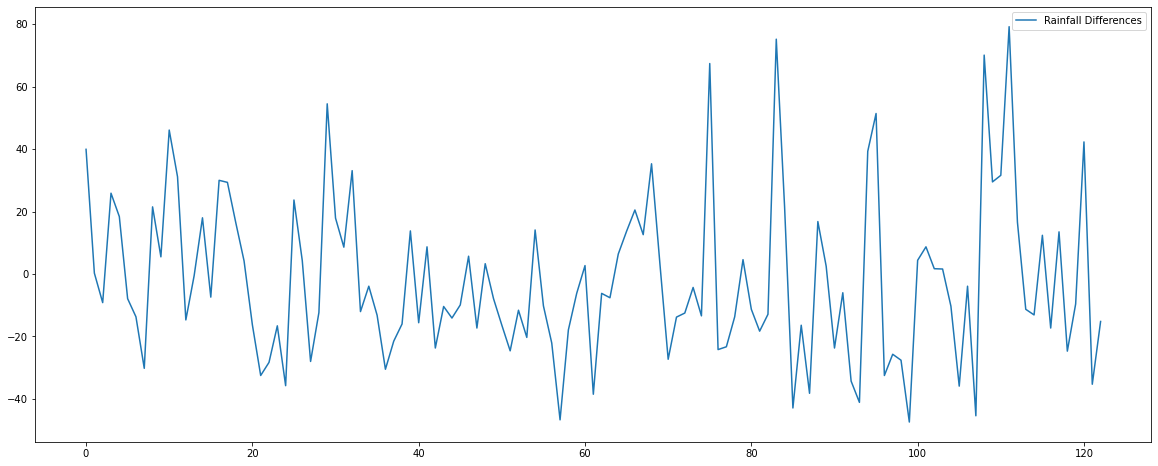

In [74]:
df7 = pd.DataFrame(([y1[i]-x1[i] for i in range(123)]), columns=["Rainfall Differences"])
df7.plot(figsize=(20,8))

<AxesSubplot:label='c2b36543-5a4e-4563-8acc-595ed1811651'>

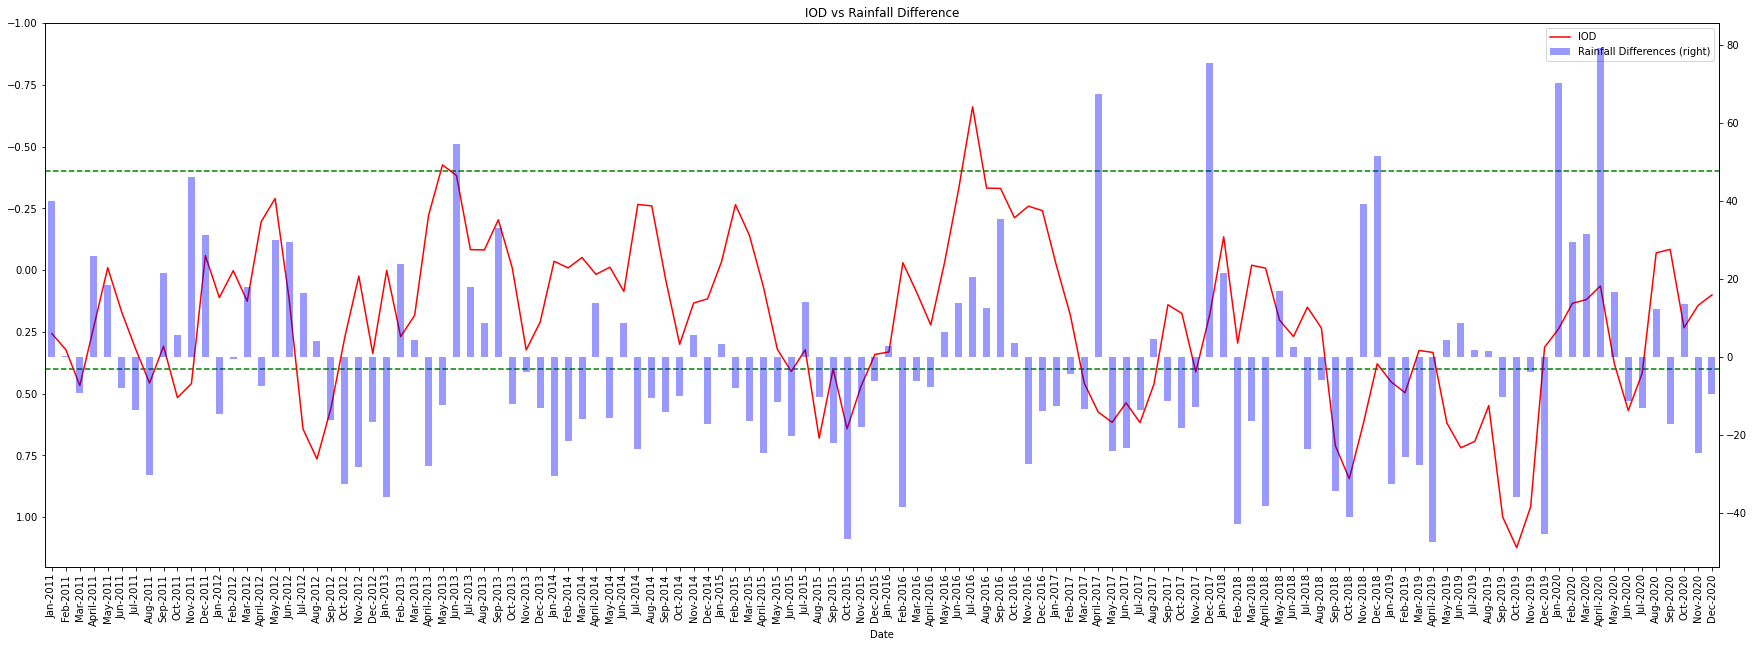

In [75]:
frame = [df4, df7, df6]
res = pd.concat(frame, axis = 1)
res_clean = res.dropna()
fig, ax = plt.subplots()
plt.axhline(y = 0.4, color = 'g', linestyle = '--')
plt.axhline(y = -0.4, color = 'g', linestyle = '--')
res_clean.plot(x = 'Date', y = 'IOD', ax = ax, color = 'red', ylim = (1.2, -1), figsize=(30, 10), title = 'IOD vs Rainfall Difference')
res_clean.plot(x = 'Date', y = 'Rainfall Differences', kind ='bar', alpha=0.4,  color = 'blue', ax = ax, secondary_y = True, figsize=(30, 10))

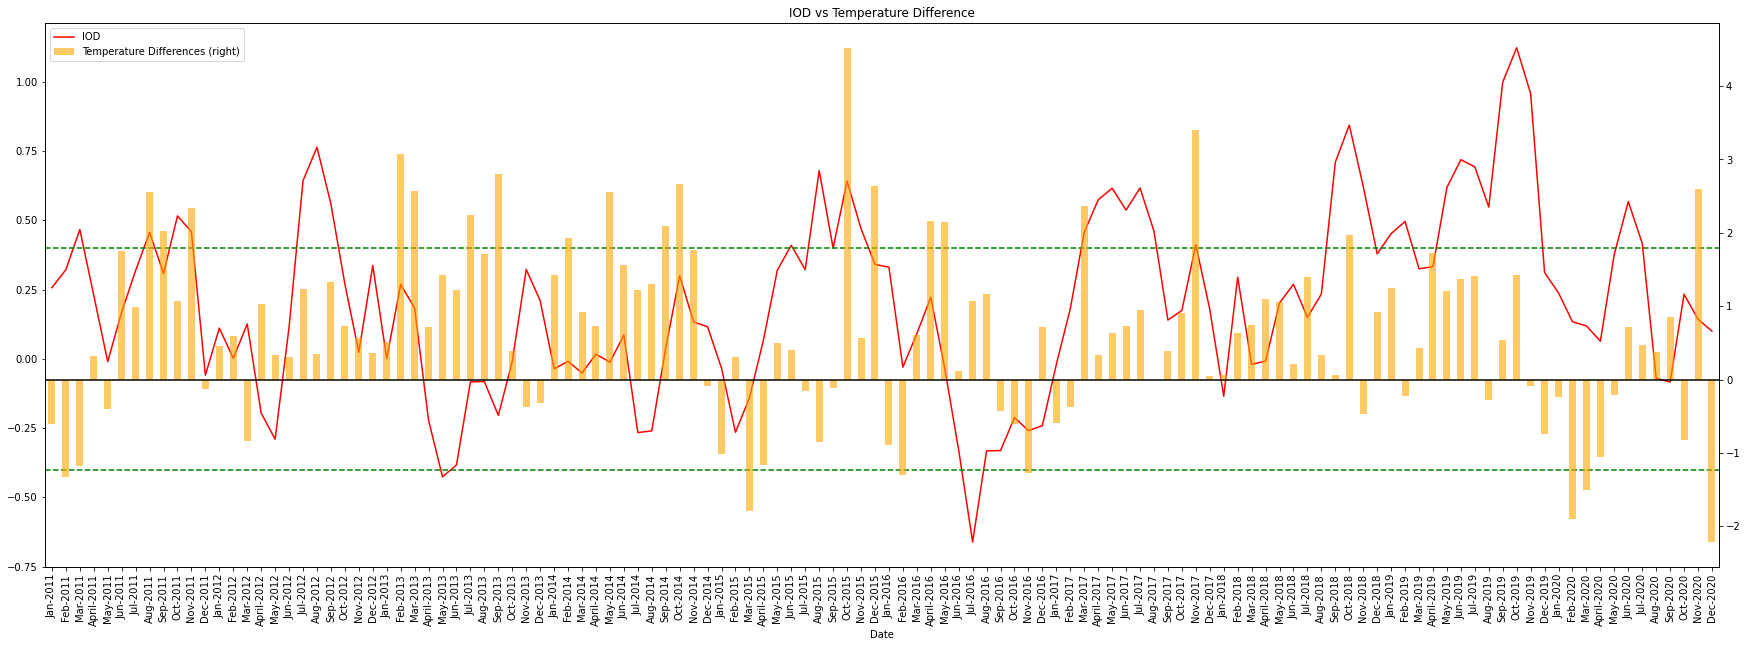

In [76]:
fig, ax = plt.subplots()
res_clean.plot(x = 'Date', y = 'IOD', color = 'red', ax = ax, figsize=(30, 10), title = 'IOD vs Temperature Difference')
plt.axhline(y = 0.4, color = 'g', linestyle = '--')
plt.axhline(y = -0.4, color = 'g', linestyle = '--')
res_clean.plot(x = 'Date', y = 'Temperature Differences', kind = 'bar', color = 'Orange', alpha = 0.6, ax = ax, secondary_y = True, figsize=(30, 10))
plt.axhline(y = 0, color = 'black', linestyle = '-')

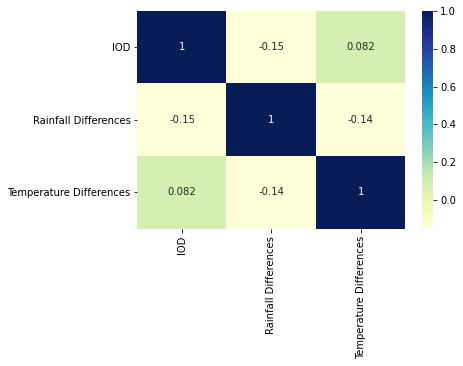

In [77]:
dataplot=sb.heatmap(res.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [78]:
df_bom

,Statistic Element,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Number of Years,Start Year,End Year
0,Mean maximum temperature (Degrees C) for years...,26.6,25.9,24.1,20.2,16.3,13.8,13.2,14.4,16.9,19.5,22,24.6,19.8,52.0,1939,2021
1,Highest temperature (Degrees C) for years 1939...,45.8,47.3,40.7,35.2,26.7,22.6,21.9,24.4,30.3,36.4,41.5,44.4,47.3,52.0,1939,2021
2,Date of Highest temperature for years 1939 to ...,31-Jan-68,7-Feb-09,4-Mar-42,10-Apr-05,4-May-67,8-Jun-05,18-Jul-13,27-Aug-07,12-Sep-09,12-Oct-06,21-Nov-19,20-Dec-19,7-Feb-09,NaN,1939,2021
3,Lowest maximum temperature (Degrees C) for yea...,14.7,13.9,13.6,10.6,8.4,6.7,6.1,6.8,8.3,10,11.3,12.5,6.1,52.0,1939,2021
4,Date of Lowest maximum temperature for years 1...,2-Jan-41,18-Feb-51,22-Mar-41,21-Apr-60,27-May-51,22-Jun-50,2-Jul-68,9-Aug-51,15-Sep-57,1-Oct-57,15-Nov-06,11-Dec-52,2-Jul-68,NaN,1939,2021
5,Decile 1 maximum temperature (Degrees C) for y...,19.6,19.3,18.2,15.2,12.9,11.2,10.6,11.4,12.7,14.3,15.9,17.8,,51.0,1939,2021
6,Decile 9 maximum temperature (Degrees C) for y...,36.1,34.2,31.6,26.4,20.3,16.6,15.7,17.8,21.4,26,30.1,34,,51.0,1939,2021
7,Mean number of days >= 30 Degrees C for years ...,8.7,7,4.9,0.5,0,0,0,0,0,0.8,3.2,6.1,31.2,52.0,1939,2021
8,Mean number of days >= 35 Degrees C for years ...,4,2.3,1,0,0,0,0,0,0,0.1,0.5,2.4,10.3,52.0,1939,2021
9,Mean number of days >= 40 Degrees C for years ...,0.9,0.3,0.1,0,0,0,0,0,0,0,0,0.4,1.7,52.0,1939,2021


In [79]:
df_bom = pd.read_csv("BOM_Data.csv")
LongTermAveMaxTemp = df_bom.loc[0, 'January':'December']
LongTermAveMaxTemp = list(LongTermAveMaxTemp)
LongTermAveMaxTemp
y = np.array(Daily_max.resample('M').agg('mean')['dry_bulb_temp'])
x = np.array(LongTermAveMaxTemp*(123//12) + LongTermAveMaxTemp[:3]).astype(float)


In [80]:
LongTermAveMinTemp = df_bom.loc[10, 'January':'December']
LongTermAveMinTemp = list(LongTermAveMinTemp)
y1 = np.array(Daily_min.resample('M').agg('mean')['dry_bulb_temp'])
x1 = np.array(LongTermAveMinTemp*(123//12) + LongTermAveMinTemp[:3]).astype(float)
df_min_anom = pd.DataFrame(([y1[i]-x1[i] for i in range(123)]), columns=["Minimum Temperature Anomalies"])

In [81]:
LongTermAveRainfall = df_bom.loc[23, 'January':'December']
LongTermAveRainfall = list(LongTermAveRainfall)
y2 = np.array(Daily_max_total['rainfall'])
x2 = np.array(LongTermAveRainfall*(123//12) + LongTermAveRainfall[:3]).astype(float)
df_rainfall_anom = pd.DataFrame(([y2[i]-x2[i] for i in range(123)]), columns=["Rainfall Anomalies"])

In [82]:
LongTermAveMaxTemp = df_bom.loc[0, 'January':'December']
LongTermAveMaxTemp = list(LongTermAveMaxTemp)
y = np.array(Daily_max.resample('M').agg('mean')['dry_bulb_temp'])
x = np.array(LongTermAveMaxTemp*(123//12) + LongTermAveMaxTemp[:3]).astype(float)
df_max_anom = pd.DataFrame(([y[i]-x[i] for i in range(123)]), columns=["Maximum Temperature Anomalies"])

In [83]:
frame1 = [df4, df_min_anom, df_rainfall_anom, df_max_anom]
df_anom = pd.concat(frame1, axis = 1)
df_anom_clean=df_anom.dropna()
df_anom_clean.plot(x = 'Date', y = 'Maximum Temperature Anomalies', kind = 'bar', color = 'Orange', alpha = 0.6, ax = ax, figsize=(30, 10))



<AxesSubplot:title={'center':'IOD vs Temperature Difference'}, xlabel='Date'>

<AxesSubplot:title={'center':'Anomalous Temperatures'}, xlabel='Date', ylabel='Temperature Difference'>

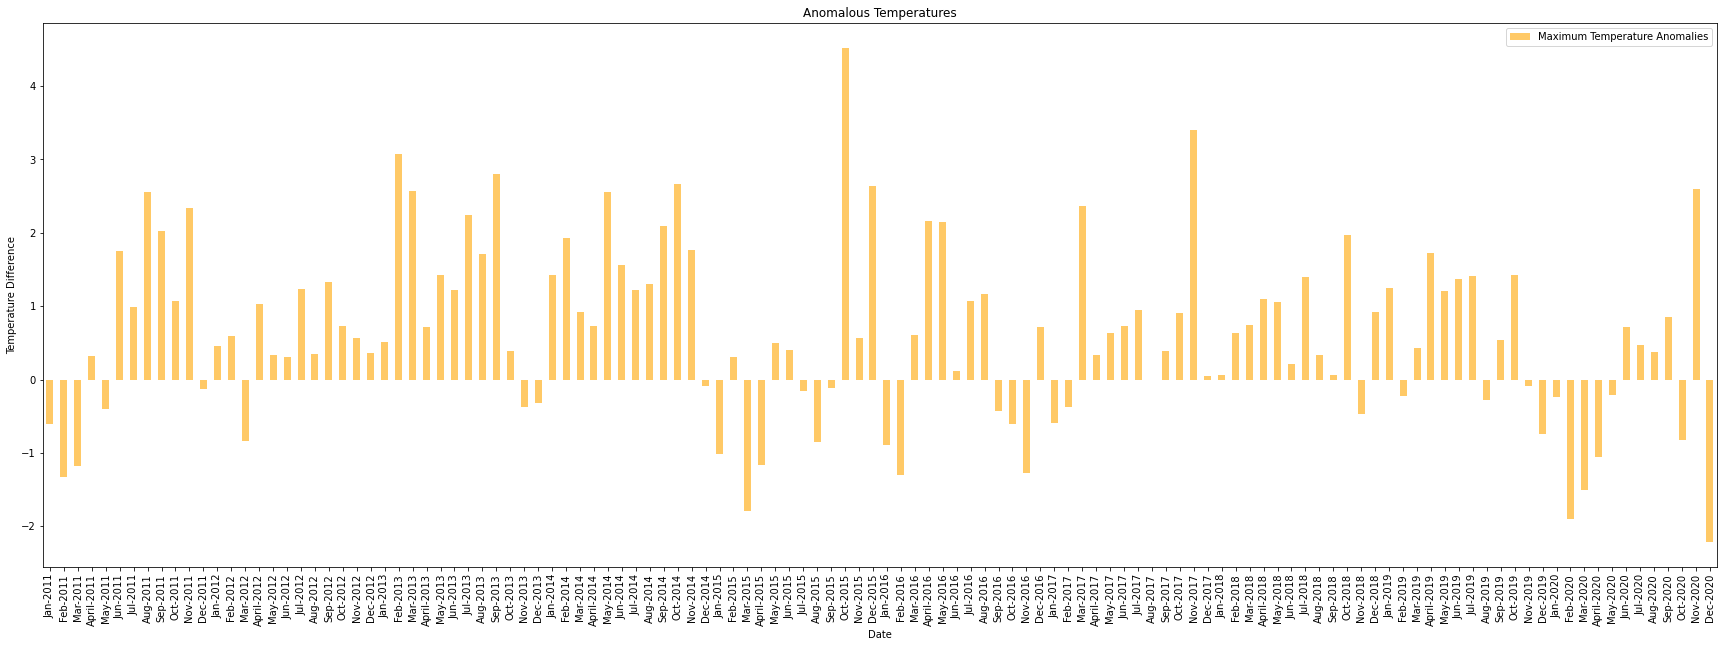

In [84]:
fig, ax = plt.subplots()
df_anom_clean.plot(x = 'Date', y = 'Maximum Temperature Anomalies', ylabel = 'Temperature Difference', kind = 'bar', color = 'Orange', alpha = 0.6, ax = ax, figsize=(30, 10), title = 'Anomalous Temperatures')

<AxesSubplot:xlabel='Date', ylabel='Temperature Anomaly'>

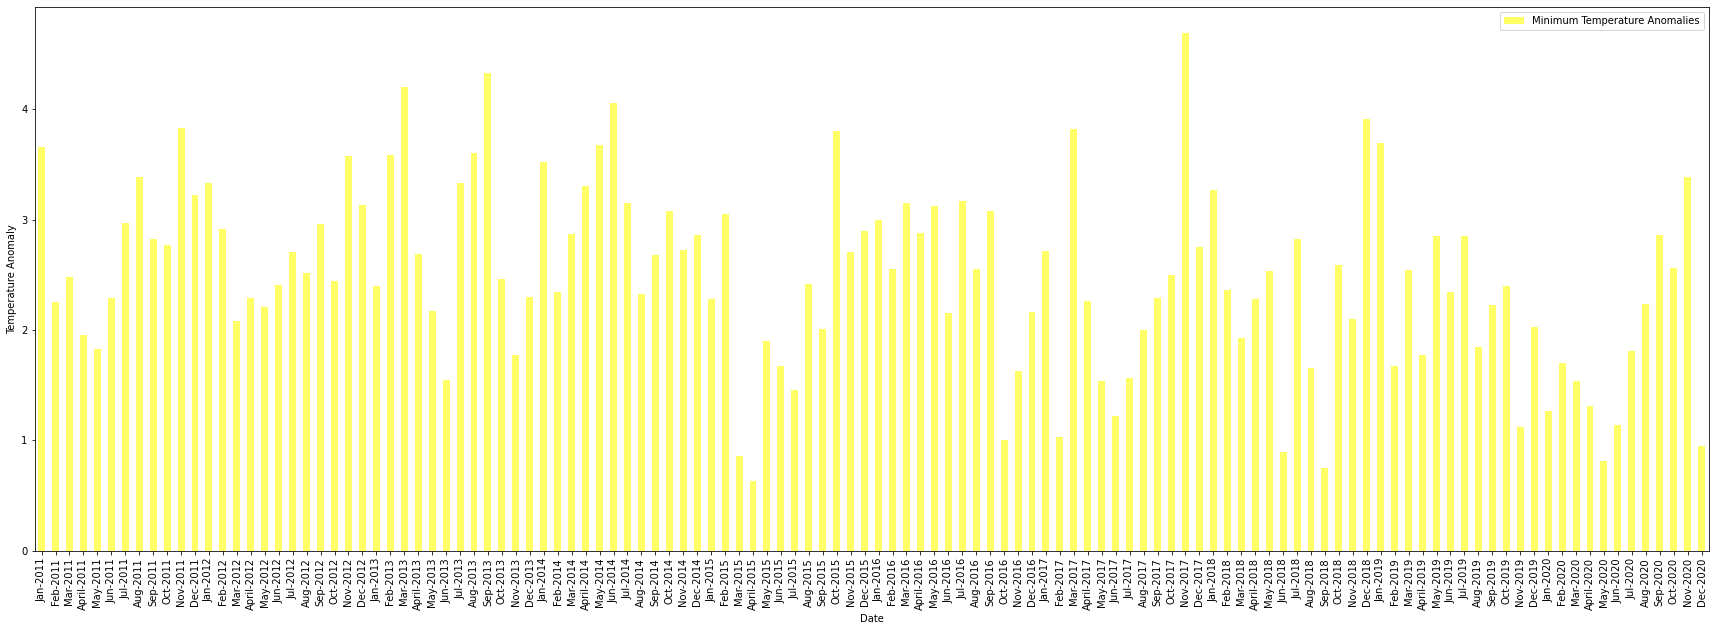

In [85]:
fig, ax = plt.subplots()
df_anom_clean.plot(x = 'Date', y = 'Minimum Temperature Anomalies', ylabel = 'Temperature Anomaly', kind = 'bar', color = 'yellow', alpha = 0.6, ax = ax, figsize=(30, 10))

<AxesSubplot:title={'center':'Anomalous Rainfall'}, xlabel='Date', ylabel='Rainfall Difference'>

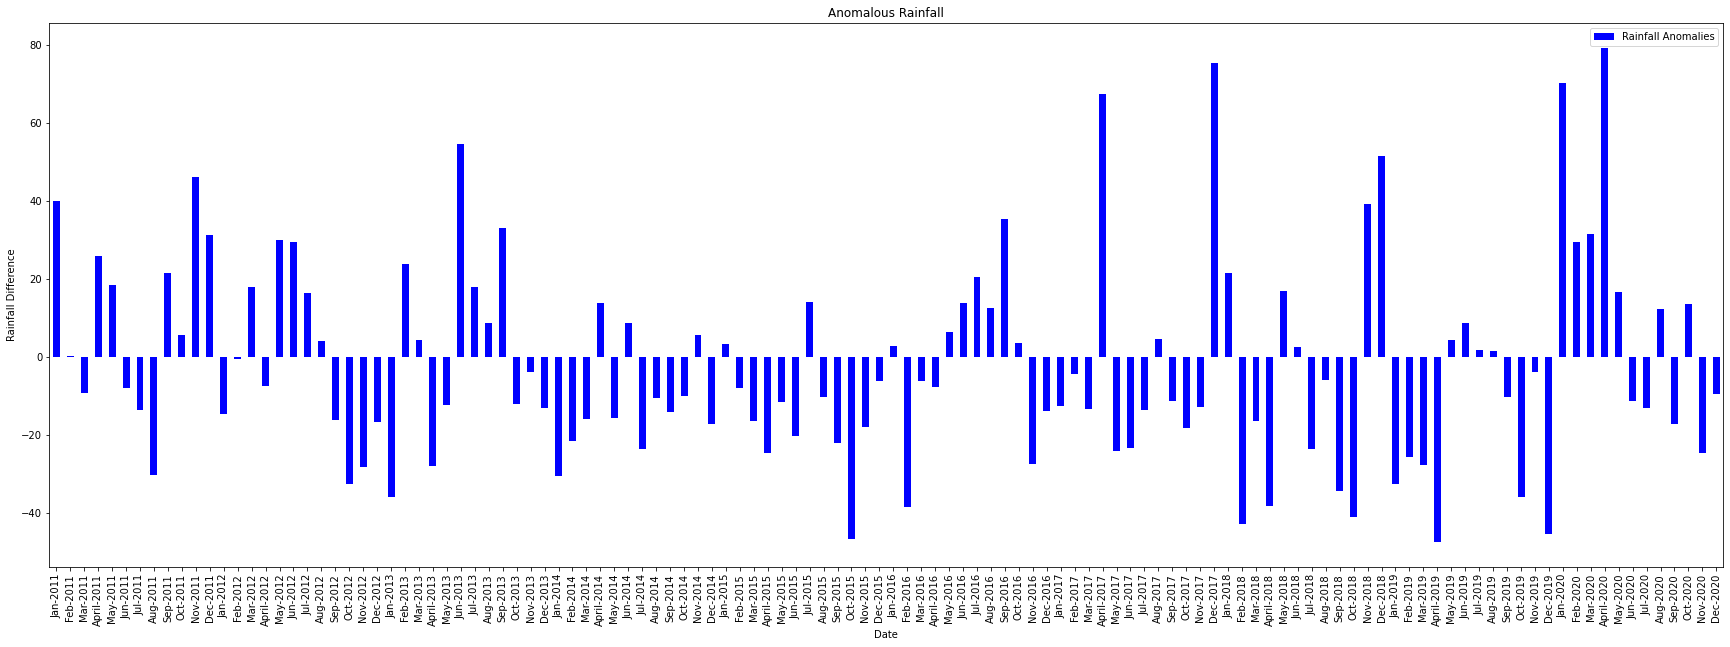

In [86]:
fig, ax = plt.subplots()
df_anom_clean.plot(x = 'Date', y = 'Rainfall Anomalies', ylabel = 'Rainfall Difference', kind = 'bar', color = 'Blue', alpha = 1, ax = ax, figsize=(30, 10), title='Anomalous Rainfall')

In [87]:
df_anom_clean.iloc[110:120]

,Date,IOD,Minimum Temperature Anomalies,Rainfall Anomalies,Maximum Temperature Anomalies
110,Mar-2020,0.119,1.539785,31.6,-1.509677
111,April-2020,0.064,1.306667,79.2,-1.053333
112,May-2020,0.378,0.816129,16.6,-0.216129
113,Jun-2020,0.568,1.140000,-11.3,0.723333
114,Jul-2020,0.417,1.806452,-13.1,0.474194
115,Aug-2020,-0.070,2.238710,12.4,0.374194
116,Sep-2020,-0.084,2.860000,-17.3,0.853333
117,Oct-2020,0.233,2.561290,13.5,-0.829032
118,Nov-2020,0.143,3.383333,-24.7,2.603333
119,Dec-2020,0.100,0.951613,-9.6,-2.212903


In [88]:
Daily_9h = df[df.index.hour == 9]
Daily_3h = df[df.index.hour == 15]
Daily_9am = Daily_9h[Daily_9h.index.minute == 0]
Daily_3pm = Daily_3h[Daily_3h.index.minute == 0]

In [89]:
Daily_9am

,dry_bulb_temp,dew_point_temp,apparent_temp,relative_humidity,wind_direction,average_wind_speed,wind_gust,pressure,rainfall
date,,,,,,,,,
2011-01-01 09:00:00,17.7,0.0,11.7,68.0,SW,13.0,15.0,1012.5,0.0
2011-01-02 09:00:00,17.1,0.0,9.4,60.0,SSW,24.0,30.0,1016.5,0.0
2011-01-03 09:00:00,15.4,0.0,4.2,47.0,S,26.0,30.0,1018.1,0.0
2011-01-04 09:00:00,15.1,0.0,7.7,61.0,S,17.0,20.0,1014.1,0.0
2011-01-05 09:00:00,17.6,0.0,11.4,67.0,S,19.0,20.0,1009.8,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-12 09:00:00,17.9,18.9,16.9,94.0,CALM,0.0,0.0,1016.7,0.0
2021-03-13 09:00:00,24.5,22.5,14.0,52.0,NNE,28.0,35.0,1007.4,0.0
2021-03-14 09:00:00,11.9,9.8,6.8,71.0,SW,20.0,26.0,1021.1,17.2


In [90]:
temp_at_9 = df.loc[45, 'January':'December']
temp_at_9 = list(temp_at_9)


KeyError: 45